# Chronic Kidney Disease Prediction

In [6]:
import sklearn
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import re

# df = pd.read_csv('C:\\Users\SHAD\Downloads\processed_kidney_data_set.csv')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv('C:\\Users\SHAD\Downloads\processed_kidney_data_set.csv')

In [7]:
# #df=df.replace('[^\d.]','',regex=True).astypey(float)
# v= lambda x:float(x[1:-1])
# df.htn=df.htn.apply(v)

In [8]:
#df.info()

In [9]:
print(df.shape)

(400, 37)


In [10]:
df.isnull().sum()

age            0
scaled_age     0
bp             0
scaled_bp      0
sg             0
al             0
scaled_al      0
su             0
scaled_su      0
rbc            0
scaled_rbc     0
pc             0
pcc            0
ba             0
bgr            0
scaled_bgr     0
bu             0
scaled_bu      0
sc             0
scaled_sc      0
sod            0
scaled_sod     0
pot            0
hemo           0
scaled_hemo    0
pcv            0
scaled_pcv     0
wbc            0
scaled_wbc     0
rbcc           0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class          0
dtype: int64

In [11]:
df.isin(['	?']).sum() #data which includes the '?' sign

age            0
scaled_age     0
bp             0
scaled_bp      0
sg             0
al             0
scaled_al      0
su             0
scaled_su      0
rbc            0
scaled_rbc     0
pc             0
pcc            0
ba             0
bgr            0
scaled_bgr     0
bu             0
scaled_bu      0
sc             0
scaled_sc      0
sod            0
scaled_sod     0
pot            0
hemo           0
scaled_hemo    0
pcv            0
scaled_pcv     0
wbc            0
scaled_wbc     0
rbcc           0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class          0
dtype: int64

In [12]:
df.isin(['	?']).sum() #data which includes the '?' sign

age            0
scaled_age     0
bp             0
scaled_bp      0
sg             0
al             0
scaled_al      0
su             0
scaled_su      0
rbc            0
scaled_rbc     0
pc             0
pcc            0
ba             0
bgr            0
scaled_bgr     0
bu             0
scaled_bu      0
sc             0
scaled_sc      0
sod            0
scaled_sod     0
pot            0
hemo           0
scaled_hemo    0
pcv            0
scaled_pcv     0
wbc            0
scaled_wbc     0
rbcc           0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class          0
dtype: int64

In [13]:
new_df=df.drop(columns=['age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc','class'])



array([[<AxesSubplot:title={'center':'scaled_age'}>,
        <AxesSubplot:title={'center':'scaled_bp'}>,
        <AxesSubplot:title={'center':'scaled_al'}>,
        <AxesSubplot:title={'center':'scaled_su'}>,
        <AxesSubplot:title={'center':'scaled_rbc'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'pcc'}>,
        <AxesSubplot:title={'center':'ba'}>,
        <AxesSubplot:title={'center':'scaled_bgr'}>,
        <AxesSubplot:title={'center':'scaled_bu'}>],
       [<AxesSubplot:title={'center':'scaled_sc'}>,
        <AxesSubplot:title={'center':'scaled_sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'scaled_hemo'}>,
        <AxesSubplot:title={'center':'scaled_pcv'}>],
       [<AxesSubplot:title={'center':'scaled_wbc'}>,
        <AxesSubplot:title={'center':'rbcc'}>,
        <AxesSubplot:title={'center':'htn'}>,
        <AxesSubplot:title={'center':'dm'}>,
        <AxesSubplot:title={'center':'cad'}>]

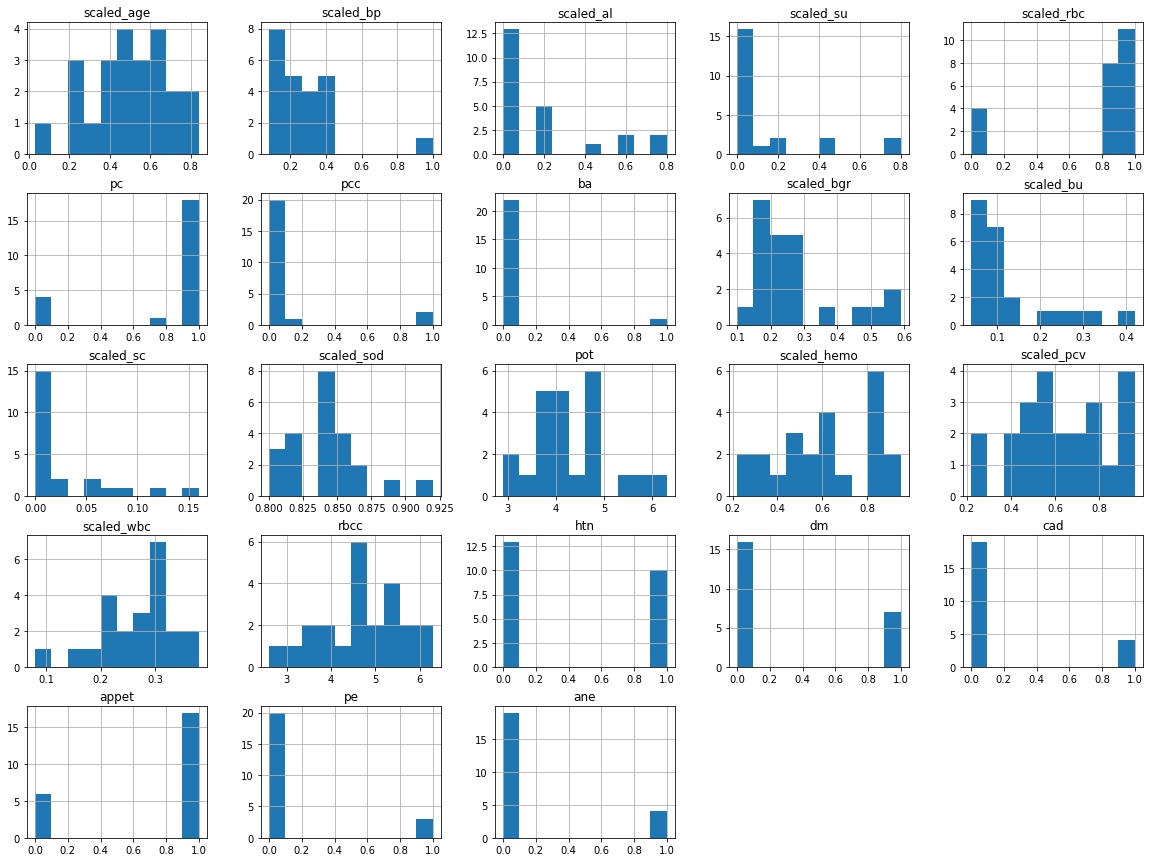

In [14]:
new_df.iloc[1:24].hist(xlabelsize=10,ylabelsize=10,figsize=(20,15)) #Histogram

In [ ]:
df.dtypes

In [ ]:
from sklearn.model_selection import train_test_split

y = df['class']

#X = df.drop(columns = 'class')
X=df.drop(columns=['age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc','class'])
#X=df.drop(columns=['scaled_age','scaled_bp','scaled_al','scaled_su','scaled_rbc','scaled_bgr','scaled_bu','scaled_sc','scaled_sod','scaled_hemo','scaled_pcv','scaled_wbc','class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_train.to_csv("XTrain.csv")
X_test.to_csv('XTest.csv')

In [ ]:
# x=df.drop('age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc')

In [ ]:
X=df.drop(columns=['age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc','class'])

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train

### Decision Tree Classifier

In [ ]:
from sklearn import tree

dtree=tree.DecisionTreeClassifier()
dtree=dtree.fit(X_train_scaled,y_train_scaled)
ypred= dtree.score(X_test_scaled,y_test_scaled)

print(ypred)

In [ ]:
pred_dtree=dtree.predict(X_test_scaled)

#### confusion matrix

In [ ]:
print(confusion_matrix(y_test_scaled,pred_dtree))

#### Classification report of Decision Tree Classifier

In [ ]:
print(classification_report(y_test_scaled,pred_dtree))

In [ ]:
plt.figure(figsize=(20,15))
tree.plot_tree(dtree,filled=True)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_scaled, y_train_scaled)
lr.score(X_test_scaled, y_test_scaled)

In [ ]:
pred_lr=lr.predict(X_test_scaled)

#### confusion matrix

In [ ]:
print(confusion_matrix(y_test_scaled,pred_lr))

#### Classification report of Logistic Regression

In [ ]:
print(classification_report(y_test_scaled,pred_lr))

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=65, metric='euclidean')
knn.fit(X_train_scaled,y_train_scaled)
prediction=knn.score(X_test_scaled, y_test_scaled)

In [ ]:
pred_knn=knn.predict(X_test_scaled)

#### confusion matrix

In [ ]:
print(confusion_matrix(y_test_scaled,pred_knn))

#### Classification report of KNeighborsClassifier

In [ ]:
print(classification_report(y_test_scaled,pred_knn))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_train_scaled.iloc[:,0],X_train_scaled.iloc[:,1],y_train_scaled,c="blue",alpha=0.5,marker = 'o')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('y')
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train_scaled)
svm.score(X_test_scaled, y_test_scaled)

In [ ]:
pred_svm=svm.predict(X_test_scaled)

#### confusion matrix

In [ ]:
print(confusion_matrix(y_test_scaled,pred_svm))

#### Classification report of svm

In [ ]:
print(classification_report(y_test_scaled,pred_svm))

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_test_scaled, y_test_scaled)


In [ ]:
pred_rf=rf.predict(X_test_scaled)

#### confusion matrix

In [ ]:
print(confusion_matrix(y_test_scaled,pred_rf))

#### Classification report of RandomForestClassifier

In [ ]:
print(classification_report(y_test_scaled,pred_rf))

# Using K-Fold


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
kf

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]):
    print(train_index, test_index)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
folds = StratifiedKFold(n_splits = 10)

cv = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
scoresLR = cross_val_score(LogisticRegression(), X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

scoresSV = cross_val_score(SVC(), X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))


scoresDtree= cross_val_score(DecisionTreeClassifier(max_depth= 10, criterion='gini'), X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Decision Tree Model: %.3f (%.3f)' % (mean(scoresDtree), std(scoresDtree)))

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(), cmap = 'twilight', annot = True)
plt.show()

# KFOLD and ROC CURVE


# KNN


In [ ]:

accuracy_rate=[]
for i in range(1,5):    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y, cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
error_rate = []


for i in range(1,5):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y, cv=10)
    error_rate.append(1-score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,5),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17,metric="euclidean")
knn.fit(X,y)
pred = knn.predict(X)

In [ ]:
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

In [ ]:
y_pred_prob = knn.predict_proba(X)[:,1]
print(roc_auc_score(y,y_pred_prob))


# Decision Tree

In [ ]:
accuracy_rate=[]
for i in range(1,30):    
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    score=cross_val_score(dt,X,y, cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
error_rate = []

for i in range(1,30):
    
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    score=cross_val_score(dt,X,y, cv=10)
    error_rate.append(1-score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max depth')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [ ]:
dt = DecisionTreeClassifier(max_depth=3,criterion = "gini")
dt.fit(X,y)
pred = dt.predict(X)

In [ ]:
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

In [ ]:
y_pred_prob = dt.predict_proba(X)[:,1]
print(roc_auc_score(y,y_pred_prob))

#  Logistic Regression Model


In [ ]:
accuracy_rate=[]
for i in range(1,30):    
    dt = LogisticRegression(C= i, solver='liblinear', random_state=0)
    score=cross_val_score(dt,X_train,y_train, cv=10)
    accuracy_rate.append(score.mean())
    
    scoresLR = cross_val_score(LogisticRegression(), X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

In [ ]:
error_rate = []

for i in range(1,30):
    
    dt = LogisticRegression(C= i, solver='liblinear', random_state=0)
    score=cross_val_score(dt,X_train,y_train, cv=10)
    error_rate.append(1-score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


In [ ]:
dt = LogisticRegression(solver='liblinear', random_state=0)
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

In [ ]:
y_pred_prob = dt.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))

# Feature Selection using RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel = 'linear')
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)

In [ ]:
print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

In [ ]:
X.head()

In [ ]:
df_rfe= new_df.iloc[:, [1,2,4,9, 10,13,14,15]]

df_rfe.head()

In [ ]:
X_rfe = df_rfe
y_rfe = df['class']

folds = StratifiedKFold(n_splits = 3)
cv = StratifiedKFold(n_splits = 3, random_state = 1, shuffle = True)
scoresLR = cross_val_score(LogisticRegression(), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

scoresSV = cross_val_score(SVC(), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))


# Roc Curve experimental

In [ ]:
lr_probs=lr.predict_proba(X_test_scaled)
lr_probs=lr_probs[:,1]
lr_auc = roc_auc_score(y_test_scaled, lr_probs)

print('Logistic: ROC AUC=%.3f' % (lr_auc))

lr_fpr, lr_tpr, _ = roc_curve(y_test_scaled, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')






dtree_probs=dtree.predict_proba(X_test_scaled)
dtree_probs=dtree_probs[:,1]
dtree_auc = roc_auc_score(y_test_scaled, dtree_probs)

print('dtree: ROC AUC=%.3f' % (dtree_auc))

dtree_fpr, dtree_tpr, _ =  roc_curve(y_test_scaled, lr_probs)

plt.plot(dtree_fpr, dtree_tpr, marker='.', label='dtree')



knn_probs=knn.predict_proba(X_test_scaled)
knn_probs=knn_probs[:,1]
knn_auc = roc_auc_score(y_test_scaled, knn_probs)

print('knn: ROC AUC=%.3f' % (knn_auc))

knn_fpr, knn_tpr, _ = roc_curve(y_test_scaled, knn_probs)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn')




rf_probs=rf.predict_proba(X_test_scaled)
rf_probs=rf_probs[:,1]
rf_auc = roc_auc_score(y_test_scaled, rf_probs)

print('rf: ROC AUC=%.3f' % (rf_auc))

rf_fpr, rf_tpr, _ = roc_curve(y_test_scaled, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='rf')







svm_probs=svm.predict_proba(X_test_scaled)
svm_probs=svm_probs[:,1]
svm_auc = roc_auc_score(y_test_scaled, svm_probs)

print('svm: ROC AUC=%.3f' % (svm_auc))

svm_fpr, svm_tpr, _ = roc_curve(y_test_scaled, svm_probs)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm')





# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Precision Recall curve

In [ ]:
!pip install plotly

In [ ]:
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import cufflinks as cf
cf.set_config_file(offline=True, sharing=False, theme='ggplot');

In [ ]:
def predict_at_threshold(prob, threshold):
    return np.where(prob >= threshold, 1., 0.)

def precision_at_threshold(Y, prob, threshold):
    Y_hat = predict_at_threshold(prob, threshold)
    return np.sum((Y_hat == 1) & (Y == 1)) / np.sum(Y_hat)

def recall_at_threshold(Y, prob, threshold):
    Y_hat = predict_at_threshold(prob, threshold)
    return np.sum((Y_hat == 1) & (Y == 1)) / np.sum(Y)

def precision_recall_curve(Y, prob):
    unique_thresh = np.unique(prob)
    precision = [precision_at_threshold(Y, prob, t) for t in unique_thresh]
    recall = [recall_at_threshold(Y, prob, t) for t in unique_thresh]
    return precision, recall, unique_thresh

In [ ]:
precision,recall,threshold=metrics.precision_recall_curve(y_train_scaled,knn.predict_proba(X_train_scaled)[:,1])

In [ ]:
fig=px.line(x=recall[:-1],y=precision[:-1],hover_name=threshold)
fig.update_xaxes(title="Recall")
fig.update_yaxes(title="Precision")
fig.show()